## Summary
This part of the analysis applies networked best-response learning to a 3-action coordination game with two actions having the same payoff.
Each agent plays a pure strategy.
The topologies used are: a clique, a 4-degree ring, and a nested clique (a topology from my research).

The best-response dynamics are implemented in learn.py (attached at the end).

## Strategy evolution as a function of network topology
The initial strategies are chosen uniformly at random.
The same set of initial strategies is used for each topology.

In [1]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
import numpy.random as nprand
import elp_networks as enet
from learn import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
nprand.seed(1125387415)

In [3]:
payoff_coordination_two = np.matrix([
    [1.0,   0,   0],
    [  0, 2.0,   0],
    [  0,   0, 2.0]
])
initial = sample_pure(1806, 3)

In [4]:
net_nk = enet.NestedClique(4)
iter_count = 5
states = {}
for i, node in enumerate(net_nk.nodes):
    states[node] = initial[i]
nk_history = learn(payoff_coordination_two, net_nk, states, best_response, iter_count)

In [5]:
net_k = enet.Clique(1806)
iter_count = 5
states = {}
for i, node in enumerate(net_k.nodes):
    states[node] = initial[i]
k_history = learn(payoff_coordination_two, net_k, states, best_response, iter_count)

In [6]:
net_ring = enet.Ring(1806, 2)
iter_count = 5
states = {}
for i, node in enumerate(net_ring.nodes):
    states[node] = initial[i]
ring_history = learn(payoff_coordination_two, net_ring, states, best_response, iter_count)

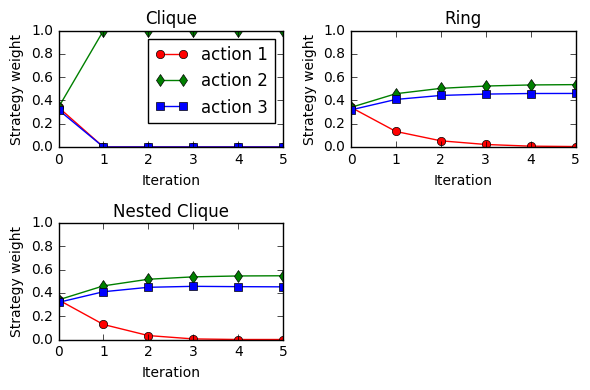

In [7]:
plt.figure
subplot(2,2,1)
plt.title("Clique")
plt.xlabel("Iteration")
plt.ylabel("Strategy weight")
plt.plot(range(iter_count+1), k_history[0], 'ro-', label="action 1")
plt.plot(range(iter_count+1), k_history[1], 'gd-', label="action 2")
plt.plot(range(iter_count+1), k_history[2], 'bs-', label="action 3")
plt.ylim(0,1)
plt.legend()
subplot(2,2,2)
plt.title("Ring")
plt.xlabel("Iteration")
plt.ylabel("Strategy weight")
plt.plot(range(iter_count+1), ring_history[0], 'ro-')
plt.plot(range(iter_count+1), ring_history[1], 'gd-')
plt.plot(range(iter_count+1), ring_history[2], 'bs-')
plt.ylim(0,1)
subplot(2,2,3)
plt.title("Nested Clique")
plt.xlabel("Iteration")
plt.ylabel("Strategy weight")
plt.plot(range(iter_count+1), nk_history[0], 'ro-')
plt.plot(range(iter_count+1), nk_history[1], 'gd-')
plt.plot(range(iter_count+1), nk_history[2], 'bs-')
plt.ylim(0,1)
plt.tight_layout()

## Expected strategy weights after convergence
For each network topology, the final weights of each strategy are averaged over 10 trials of 5 iterations each.

In [8]:
end_weight = {
    "k": np.zeros(shape=(3,)),
    "ring": np.zeros(shape=(3,)),
    "nk": np.zeros(shape=(3,))
}
for trial in range(10):
    clear_output()
    print "Trial: %d" % trial
    initial = sample_pure(1806, 3)
    # Clique
    states = {}
    for i, node in enumerate(net_k.nodes):
        states[node] = initial[i]
    k_history = learn(payoff_coordination_two, net_k, states, best_response, iter_count)
    end_weight["k"][0] += k_history[0][-1]
    end_weight["k"][1] += k_history[1][-1]
    end_weight["k"][2] += k_history[2][-1]
    # Ring
    states = {}
    for i, node in enumerate(net_ring.nodes):
        states[node] = initial[i]
    ring_history = learn(payoff_coordination_two, net_ring, states, best_response, iter_count)
    end_weight["ring"][0] += ring_history[0][-1]
    end_weight["ring"][1] += ring_history[1][-1]
    end_weight["ring"][2] += ring_history[2][-1]
    # Nested clique
    states = {}
    for i, node in enumerate(net_nk.nodes):
        states[node] = initial[i]
    nk_history = learn(payoff_coordination_two, net_nk, states, best_response, iter_count)
    end_weight["nk"][0] += nk_history[0][-1]
    end_weight["nk"][1] += nk_history[1][-1]
    end_weight["nk"][2] += nk_history[2][-1]
# Normalize
end_weight["k"] = end_weight["k"] / np.sum(end_weight["k"])
end_weight["ring"] = end_weight["ring"] / np.sum(end_weight["ring"])
end_weight["nk"] = end_weight["nk"] / np.sum(end_weight["nk"])
# Output results
clear_output()
print "Network        A1\tA2\tA3"
print "Clique         %0.3f\t%0.3f\t%0.3f" % tuple(end_weight["k"])
print "Ring           %0.3f\t%0.3f\t%0.3f" % tuple(end_weight["ring"])
print "Nested Clique  %0.3f\t%0.3f\t%0.3f" % tuple(end_weight["nk"])


Network        A1	A2	A3
Clique         0.000	0.400	0.600
Ring           0.005	0.502	0.494
Nested Clique  0.000	0.513	0.487


## Discussion
The clique immediately converges to a single strategy: whichever high-payoff strategy had the most weight in the initial agent strategies.
In both the ring and the nested clique, the high-payoff strategies seem to maintain a high weight.
However, the clique is a limiting case of the ring, so it's possible that the ring and/or nested clique might eventually converge to a single strategy.

Over many trials with different initial strategies, all topologies have about a 50% weight for each of the high-payoff strategies, but the clique converges randomly to one strategy, while the other topologies share weight between the two strategies. 